In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
from pylab import rcParams
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

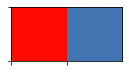

In [182]:
# Create an array with the colors you want to use
colors = ["#FF0B04", "#4374B3"]

# Set your custom color palette
my_pal = sns.color_palette(colors)
sns.palplot(my_pal)

# Acquire Data

In [148]:
train = pd.read_csv('train.csv')

In [ ]:
#sample train observations 

train_ = train.sample(1000000) 

In [36]:
train_labels = pd.read_csv('train_labels.csv')

In [4]:
specs = pd.read_csv('specs.csv')

In [164]:
print(f'Size of train data is {train.shape}.')
print(f'Size of train_ data is {train_.shape}.')
print(f'Size of train_labels data is {train_labels.shape}.')
print(f'Size of specs data is {specs.shape}.')

Size of train data is (11341042, 11).
Size of train_ data is (1000000, 11).
Size of train_labels data is (17690, 7).
Size of specs data is (386, 3).


# Summarize train_ df

In [149]:
print(f'The train df has {train.shape[0]} rows and {train.shape[1]} columns.')
print(f'The train_ df has {train_.shape[0]} rows and {train_.shape[1]} columns.')

The train df has 11341042 rows and 11 columns.
The train_ df has 1000000 rows and 11 columns.


In [165]:
train_.head(1)

,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world
1138194,6c517a88,665629a879481995,2019-08-04T12:13:50.279Z,"{""coordinates"":{""x"":705,""y"":195,""stage_width"":...",1a748eff,148,4070,289254,Dino Drink,Game,MAGMAPEAK


In [173]:
train.game_session.value_counts().count()

303319

In [174]:
train.installation_id.value_counts().count()

17000

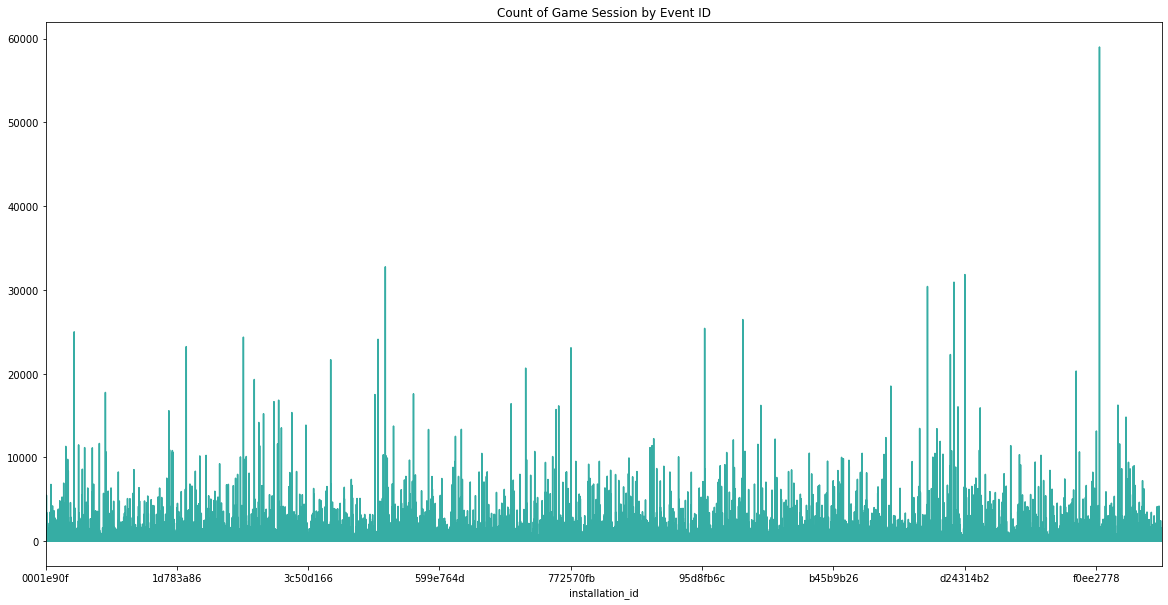

In [179]:
plt.figure(figsize = (20, 10))
train.groupby('installation_id')['event_id'].count().plot(c=my_pal[3])

plt.title('Count of Game Session by Event ID')
plt.show()

In [152]:
# train sample df representative of train df

train_.describe(), train.describe()

(          event_count      event_code     game_time
 count  1000000.000000  1000000.000000  1.000000e+06
 mean       105.516349     3513.826022  1.987830e+05
 std        148.097846      681.781191  1.847707e+06
 min          1.000000     2000.000000  0.000000e+00
 25%         25.000000     3021.000000  3.057000e+04
 50%         60.000000     4020.000000  7.264300e+04
 75%        128.000000     4035.000000  1.572660e+05
 max       3364.000000     5010.000000  3.068999e+08,
         event_count    event_code     game_time
 count  1.134104e+07  1.134104e+07  1.134104e+07
 mean   1.056642e+02  3.513838e+03  1.976236e+05
 std    1.483477e+02  6.816470e+02  1.803968e+06
 min    1.000000e+00  2.000000e+03  0.000000e+00
 25%    2.500000e+01  3.021000e+03  3.061800e+04
 50%    6.100000e+01  4.020000e+03  7.276100e+04
 75%    1.290000e+02  4.035000e+03  1.574460e+05
 max    3.368000e+03  5.010000e+03  3.069102e+08)

In [153]:
train_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 1138194 to 7030313
Data columns (total 11 columns):
event_id           1000000 non-null object
game_session       1000000 non-null object
timestamp          1000000 non-null object
event_data         1000000 non-null object
installation_id    1000000 non-null object
event_count        1000000 non-null int64
event_code         1000000 non-null int64
game_time          1000000 non-null int64
title              1000000 non-null object
type               1000000 non-null object
world              1000000 non-null object
dtypes: int64(3), object(8)
memory usage: 91.6+ MB


In [163]:
print(f"The train df has {train['installation_id'].nunique()} unique installation_id values and no nulls.")
print(f"The train_ df has {train_['installation_id'].nunique()} unique installation_id values and no nulls.")

The train df has 17000 unique installation_id values and no nulls.
The train_ df has 13284 unique installation_id values and no nulls.


In [155]:
train_.isnull().sum()

event_id           0
game_session       0
timestamp          0
event_data         0
installation_id    0
event_count        0
event_code         0
game_time          0
title              0
type               0
world              0
dtype: int64

In [156]:
train_.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

event_id              374
game_session       124501
timestamp          995361
event_data         967629
installation_id     13284
title                  44
type                    4
world                   4
dtype: int64

# Summarize train_labels df

In [37]:
print(f'The train_labels df has {train_labels.shape[0]} rows and {train_labels.shape[1]} columns.')

The train_labels df has 17690 rows and 7 columns.


In [38]:
print(f"The train_label df has {train_labels['installation_id'].nunique()} unique installation_id values and no nulls.")

The train_label df has 3614 unique installation_id values and no nulls.


In [39]:
train_labels.isnull().sum()

game_session       0
installation_id    0
title              0
num_correct        0
num_incorrect      0
accuracy           0
accuracy_group     0
dtype: int64

In [40]:
train_labels.head()

,game_session,installation_id,title,num_correct,num_incorrect,accuracy,accuracy_group
0,6bdf9623adc94d89,0006a69f,Mushroom Sorter (Assessment),1,0,1.0,3
1,77b8ee947eb84b4e,0006a69f,Bird Measurer (Assessment),0,11,0.0,0
2,901acc108f55a5a1,0006a69f,Mushroom Sorter (Assessment),1,0,1.0,3
3,9501794defd84e4d,0006a69f,Mushroom Sorter (Assessment),1,1,0.5,2
4,a9ef3ecb3d1acc6a,0006a69f,Bird Measurer (Assessment),1,0,1.0,3


In [41]:
train_labels.describe()

,num_correct,num_incorrect,accuracy,accuracy_group
count,17690.000000,17690.000000,17690.000000,17690.000000
mean,0.760938,1.587790,0.595810,1.885585
std,0.426523,3.058295,0.430559,1.256796
min,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.111111,1.000000
50%,1.000000,0.500000,0.750000,2.500000
75%,1.000000,2.000000,1.000000,3.000000
max,1.000000,85.000000,1.000000,3.000000


In [42]:
train_labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17690 entries, 0 to 17689
Data columns (total 7 columns):
game_session       17690 non-null object
installation_id    17690 non-null object
title              17690 non-null object
num_correct        17690 non-null int64
num_incorrect      17690 non-null int64
accuracy           17690 non-null float64
accuracy_group     17690 non-null int64
dtypes: float64(1), int64(3), object(3)
memory usage: 967.5+ KB


In [57]:
train_labels.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

game_session       17690
installation_id     3614
title                  5
dtype: int64

In [43]:
train_labels.groupby('accuracy_group')['installation_id'].count()

accuracy_group
0    4229
1    2411
2    2205
3    8845
Name: installation_id, dtype: int64

## 50% of users pass the assessments on the first try

In [48]:
values['count'] = pd.DataFrame(train_labels.accuracy_group.value_counts())

In [49]:
values['percent'] = train_labels.accuracy_group.value_counts(normalize=True)

In [51]:
values.drop(columns='accuracy_group')

,percent,count
3,0.500000,8845
0,0.239062,4229
1,0.136292,2411
2,0.124647,2205


# Summarize spec data

In [53]:
print(f'The specs df has {specs.shape[0]} rows and {specs.shape[1]} columns.')

The specs df has 386 rows and 3 columns.


In [52]:
specs.head()

,event_id,info,args
0,2b9272f4,The end of system-initiated feedback (Correct)...,"[{""name"":""game_time"",""type"":""int"",""info"":""mill..."
1,df4fe8b6,The end of system-initiated feedback (Incorrec...,"[{""name"":""game_time"",""type"":""int"",""info"":""mill..."
2,3babcb9b,The end of system-initiated instruction event ...,"[{""name"":""game_time"",""type"":""int"",""info"":""mill..."
3,7f0836bf,The end of system-initiated instruction event ...,"[{""name"":""game_time"",""type"":""int"",""info"":""mill..."
4,ab3136ba,The end of system-initiated instruction event ...,"[{""name"":""game_time"",""type"":""int"",""info"":""mill..."


In [58]:
specs.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

event_id    386
info        168
args        191
dtype: int64

# Explore train_ df

In [157]:
corrs = train_.corr()
corrs

,event_count,event_code,game_time
event_count,1.000000,0.043630,0.139358
event_code,0.043630,1.000000,0.006159
game_time,0.139358,0.006159,1.000000


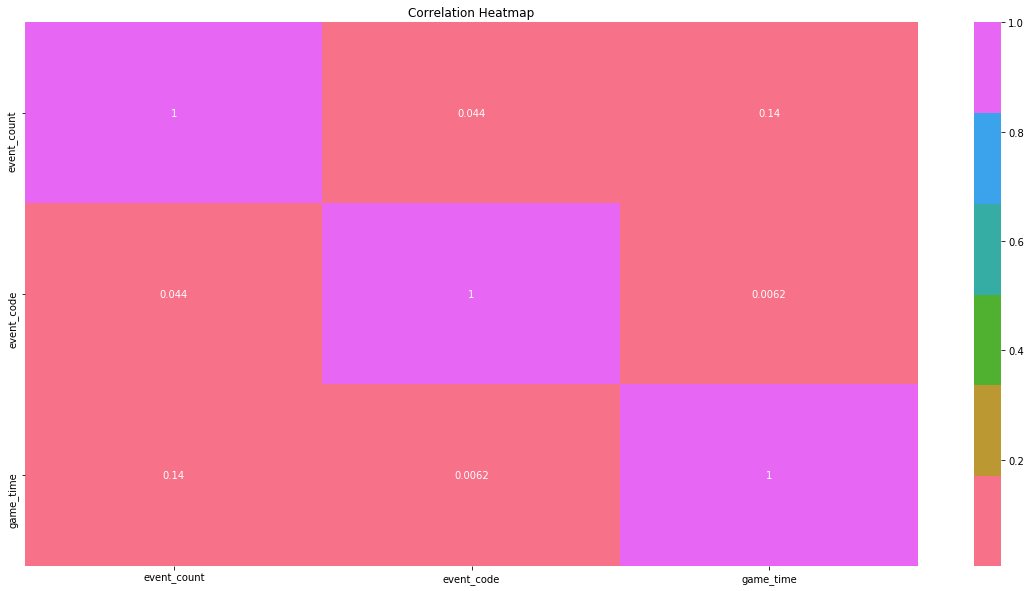

In [177]:
plt.figure(figsize = (20, 10))

sns.heatmap(corrs, cmap = my_pal, annot = True)
plt.title('Correlation Heatmap');

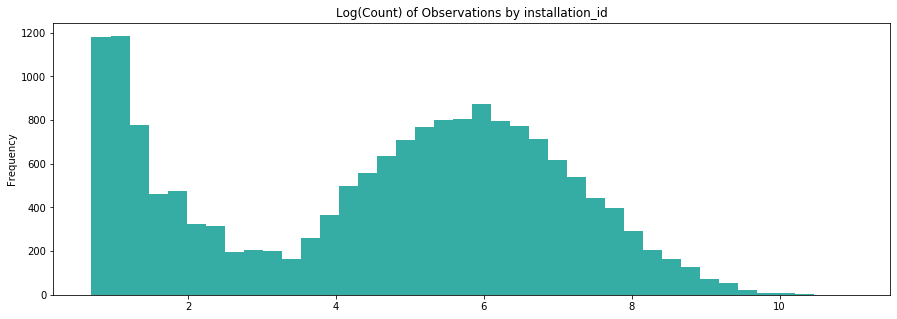

In [176]:
train.groupby('installation_id') \
    .count()['event_id'] \
    .apply(np.log1p) \
    .plot(kind='hist',
          bins=40,
          color=my_pal[3],
         figsize=(15, 5),
         title='Log(Count) of Observations by installation_id')
plt.show()

In [159]:
train_.head(1)

,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world
1138194,6c517a88,665629a879481995,2019-08-04T12:13:50.279Z,"{""coordinates"":{""x"":705,""y"":195,""stage_width"":...",1a748eff,148,4070,289254,Dino Drink,Game,MAGMAPEAK


In [160]:
train_labels.head(1)

,game_session,installation_id,title,num_correct,num_incorrect,accuracy,accuracy_group
0,6bdf9623adc94d89,0006a69f,Mushroom Sorter (Assessment),1,0,1.0,3


In [162]:
merge = train_.merge(right=train_labels, how='outer', on='game_session')
merge.isnull().sum()

event_id                926
game_session              0
timestamp               926
event_data              926
installation_id_x       926
event_count             926
event_code              926
game_time               926
title_x                 926
type                    926
world                   926
installation_id_y    923816
title_y              923816
num_correct          923816
num_incorrect        923816
accuracy             923816
accuracy_group       923816
dtype: int64

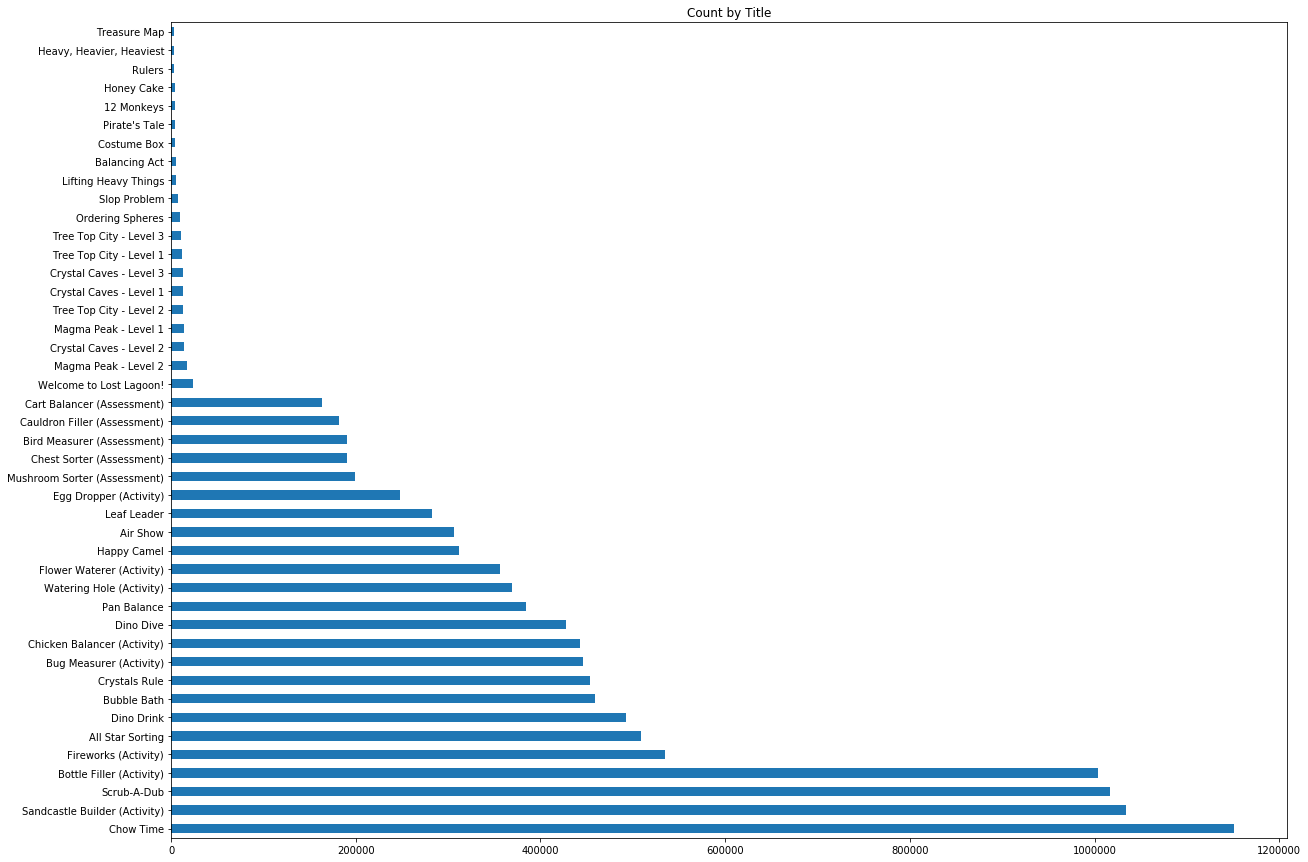

In [122]:
train['title'].value_counts().plot(kind='barh', figsize=(20, 15), title='Count by Title')

plt.show()

In [123]:
train.world.value_counts()

MAGMAPEAK       5023687
CRYSTALCAVES    3232546
TREETOPCITY     3061231
NONE              23578
Name: world, dtype: int64

- Convert timestamp to datetime object and extract hour time parts for exploration

In [124]:
# Format and make date / hour features
train['timestamp'] = pd.to_datetime(train['timestamp'])
train['date'] = train['timestamp'].dt.date
train['hour'] = train['timestamp'].dt.hour
train['weekday_name'] = train['timestamp'].dt.weekday_name
# Same for test
# test['timestamp'] = pd.to_datetime(test['timestamp'])
# test['date'] = test['timestamp'].dt.date
# test['hour'] = test['timestamp'].dt.hour
# test['weekday_name'] = test['timestamp'].dt.weekday_name

In [125]:
train.head(1)

,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world,date,hour,weekday_name
0,27253bdc,45bb1e1b6b50c07b,2019-09-06 17:53:46.937000+00:00,"{""event_code"": 2000, ""event_count"": 1}",0001e90f,1,2000,0,Welcome to Lost Lagoon!,Clip,NONE,2019-09-06,17,Friday


In [128]:
train.weekday_name.value_counts()

Friday       1801243
Thursday     1689996
Monday       1617978
Saturday     1590883
Tuesday      1566807
Sunday       1540013
Wednesday    1534122
Name: weekday_name, dtype: int64

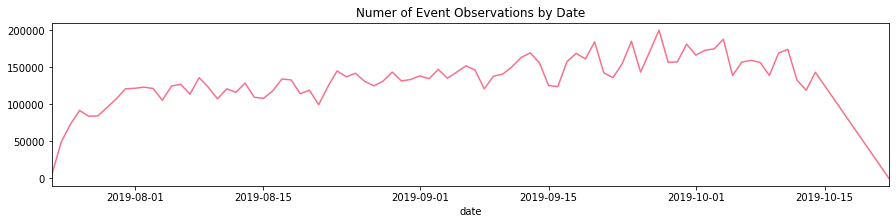

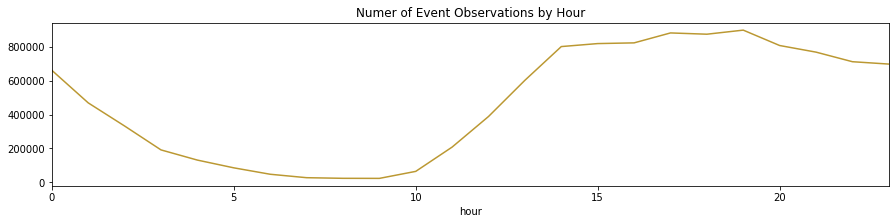

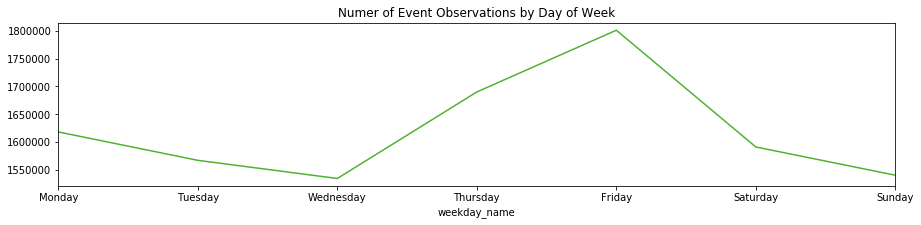

In [146]:
train.groupby('date')['event_id'] \
    .agg('count') \
    .plot(figsize=(15, 3),
         title='Numer of Event Observations by Date',
         color=my_pal[0])
plt.show()
train.groupby('hour')['event_id'] \
    .agg('count') \
    .plot(figsize=(15, 3),
         title='Numer of Event Observations by Hour',
         color=my_pal[1])
plt.show()
train.groupby('weekday_name')['event_id'] \
    .agg('count').T[['Monday','Tuesday','Wednesday',
                     'Thursday','Friday','Saturday',
                     'Sunday']].T.plot(figsize=(15, 3),
                                       title='Numer of Event Observations by Day of Week',
                                       color=my_pal[2])
plt.show()

# Explore train_labels df

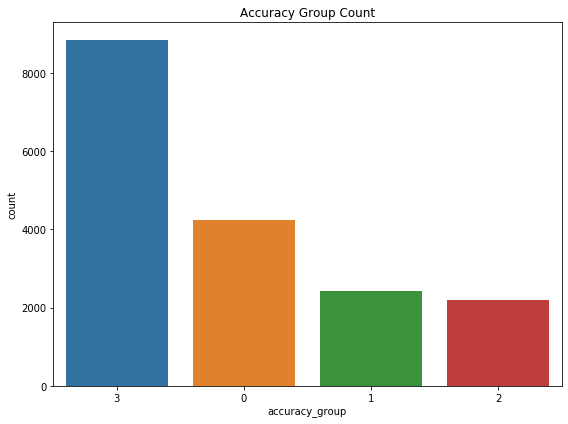

In [119]:
plt.figure(figsize=(8, 6))

sns.countplot(x="accuracy_group",data=train_labels, order = train_labels['accuracy_group'].value_counts().index)

plt.title('Accuracy Group Count')
plt.tight_layout()
plt.show()

In [69]:
corrs = train_labels.corr()
corrs

,num_correct,num_incorrect,accuracy,accuracy_group
num_correct,1.000000,-0.417492,0.775654,0.840957
num_incorrect,-0.417492,1.000000,-0.593068,-0.573865
accuracy,0.775654,-0.593068,1.000000,0.988150
accuracy_group,0.840957,-0.573865,0.988150,1.000000


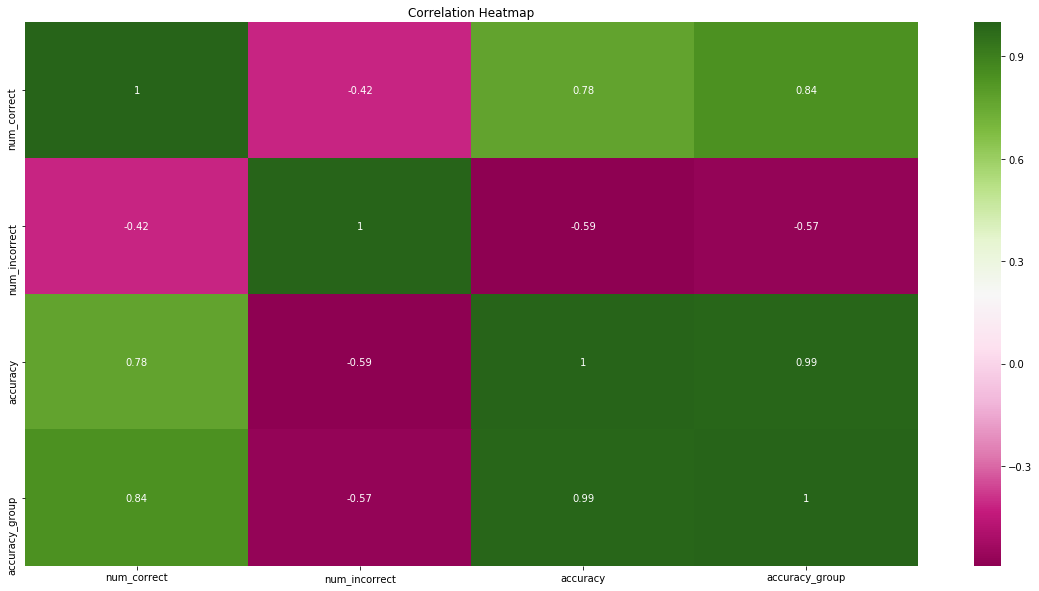

In [70]:
plt.figure(figsize = (20, 10))

sns.heatmap(corrs, cmap = 'PiYG', annot = True)
plt.title('Correlation Heatmap');

In [86]:
train_labels[train_labels['accuracy_group'] == 3]['title'].value_counts()

Cart Balancer (Assessment)      2752
Cauldron Filler (Assessment)    2545
Mushroom Sorter (Assessment)    2348
Bird Measurer (Assessment)       693
Chest Sorter (Assessment)        507
Name: title, dtype: int64

In [87]:
train_labels[train_labels['accuracy_group'] == 2]['title'].value_counts()

Cauldron Filler (Assessment)    630
Cart Balancer (Assessment)      470
Mushroom Sorter (Assessment)    460
Bird Measurer (Assessment)      389
Chest Sorter (Assessment)       256
Name: title, dtype: int64

In [88]:
train_labels[train_labels['accuracy_group'] == 1]['title'].value_counts()

Bird Measurer (Assessment)      778
Chest Sorter (Assessment)       466
Cauldron Filler (Assessment)    459
Mushroom Sorter (Assessment)    355
Cart Balancer (Assessment)      353
Name: title, dtype: int64

In [89]:
train_labels[train_labels['accuracy_group'] == 0]['title'].value_counts()

Chest Sorter (Assessment)       1752
Bird Measurer (Assessment)       886
Mushroom Sorter (Assessment)     594
Cart Balancer (Assessment)       576
Cauldron Filler (Assessment)     421
Name: title, dtype: int64

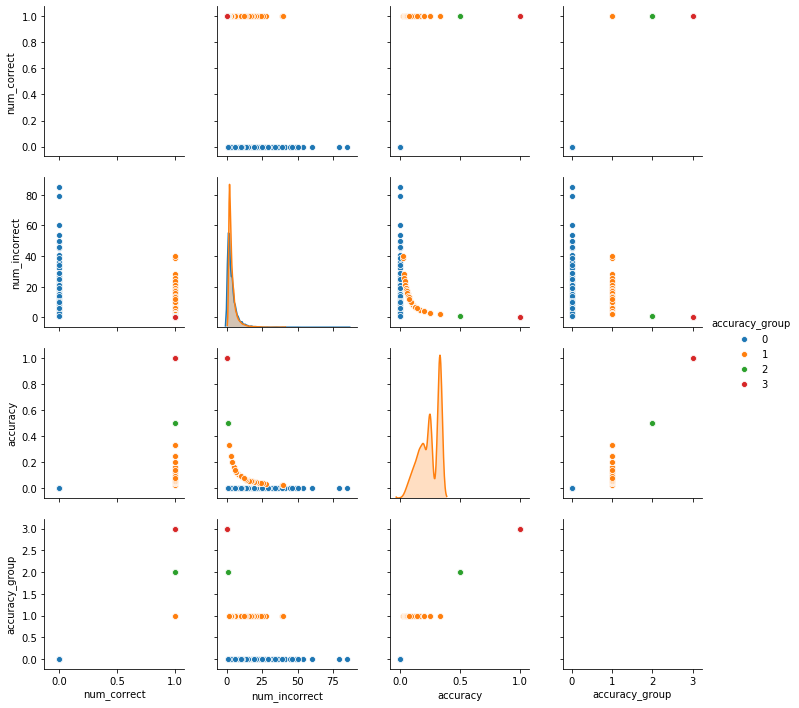

In [91]:
sns.pairplot(train_labels, hue='accuracy_group')
plt.show()